# Лабораторная работа №2: Разведочный анализ данных. Исследование и визуализация данных.

**Цель лабораторной работы:** научиться проводить обработку пропусков в данных, кодирование категориальных признаков и масштабирование данных. 

## Импорт библиотек

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

## Загрузка и первичный анализ данных

Используем данные о покупателях велосипедах: https://www.kaggle.com/datasets/heeraldedhia/bike-buyers

In [2]:
data = pd.read_csv('C:/Users/Tim/Desktop/Untitled Folder/ML_Lab_2/bike_buyers.csv')

In [3]:
data.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
ID                  1000 non-null int64
Marital Status      993 non-null object
Gender              989 non-null object
Income              994 non-null float64
Children            992 non-null float64
Education           1000 non-null object
Occupation          1000 non-null object
Home Owner          996 non-null object
Cars                991 non-null float64
Commute Distance    1000 non-null object
Region              1000 non-null object
Age                 992 non-null float64
Purchased Bike      1000 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


В имеющихся данных 13 колонок различного типа. В датасете присутствуют пропуски, оценим их количество:

In [5]:
data.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

Пропуски присутствуют как в столбцах с категориальными, так и с количественными значениями, присутпим к их последовательной обработке:

## Обработка пропусков

### Обработка пропусков в числовых данных

Выберем из всех колонок только те, в которых есть числовые значения и в которых есть пропуски.

In [6]:
col_list = []
for column in data.columns:
    if (data[column].isna().sum() != 0) and (data[column].dtype == 'float64'):
        col_list.append(column)
col_list

['Income', 'Children', 'Cars', 'Age']

C:\Users\Tim\anaconda3\envs\praktikum_env_win_new\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Tim\anaconda3\envs\praktikum_env_win_new\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


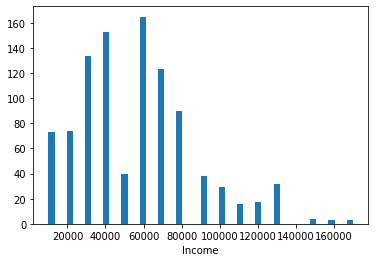

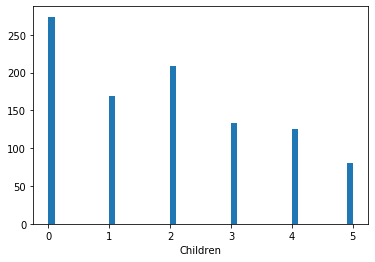

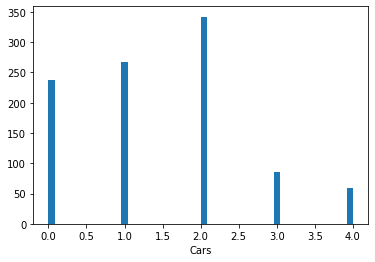

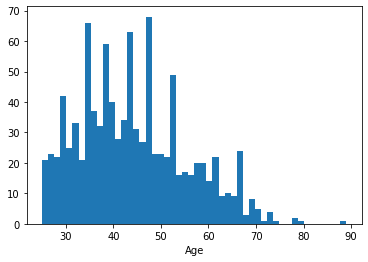

In [7]:
for col in col_list:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Проведем заполнение пропусков медианными значениями, используя встроенные инструменты библиотеки pandas:

In [8]:
for col in col_list:
    data[col] = data[col].fillna(data[col].median())

Проверим, как сработал наш метод:

In [9]:
for col in col_list:
    print(col, data[col].isna().sum())

Income 0
Children 0
Cars 0
Age 0


От пропусков в количественных параметрах мы избавились, перейдем к обработке категориальных значений:

### Обработка пропусков в категориальных данных

Заполним пропуски в категориальных данных наиболее часто встречающимися значениями, используя средства импьютации библиотеки scikit-learn

In [10]:
col_list_categ = []
for column in data.columns:
    if (data[column].isna().sum() != 0) and (data[column].dtype == 'object'):
        col_list_categ.append(column)
col_list_categ

['Marital Status', 'Gender', 'Home Owner']

In [11]:
## TODO: добавить графики для col_list_categ

In [12]:
for column in col_list_categ:
    cat_temp_data = data[[column]]
    imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    cat_temp_data = imp2.fit_transform(cat_temp_data)
    print(column, np.unique(cat_temp_data))
    my_list = map(lambda x: x[0], cat_temp_data)
    data[column] = pd.Series(my_list)

Marital Status ['Married' 'Single']
Gender ['Female' 'Male']
Home Owner ['No' 'Yes']


In [13]:
data.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [14]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


Пропуски в категориальных значений обработаны.

## Кодирование категориальных признаков числовыми значениями

Проведем кодирование категориальных признаков, значения которых нельзя закодировать бинарно:

In [15]:
oe = OrdinalEncoder()

In [16]:
data_oe = data[['Education', 'Occupation', 'Region']]
data_oe.head()

,Education,Occupation,Region
0,Bachelors,Skilled Manual,Europe
1,Partial College,Clerical,Europe
2,Partial College,Professional,Europe
3,Bachelors,Professional,Pacific
4,Bachelors,Clerical,Europe


In [17]:
data_oe = oe.fit_transform(data_oe)
data_oe

array([[0., 4., 0.],
       [3., 0., 0.],
       [3., 3., 0.],
       ...,
       [0., 4., 1.],
       [0., 1., 1.],
       [2., 3., 1.]])

In [18]:
np.unique(data_oe[:, 0])

array([0., 1., 2., 3., 4.])

In [19]:
np.unique(data_oe[:, 1])

array([0., 1., 2., 3., 4.])

In [20]:
np.unique(data_oe[:, 2])

array([0., 1., 2.])

In [21]:
oe.categories_

[array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
        'Partial High School'], dtype=object),
 array(['Clerical', 'Management', 'Manual', 'Professional',
        'Skilled Manual'], dtype=object),
 array(['Europe', 'North America', 'Pacific'], dtype=object)]

In [22]:
oe.inverse_transform(data_oe)

array([['Bachelors', 'Skilled Manual', 'Europe'],
       ['Partial College', 'Clerical', 'Europe'],
       ['Partial College', 'Professional', 'Europe'],
       ...,
       ['Bachelors', 'Skilled Manual', 'North America'],
       ['Bachelors', 'Management', 'North America'],
       ['High School', 'Professional', 'North America']], dtype=object)

## Масштабирование данных

Проведем масштабирование числовых данных, используя стратегию MinMax:

### MinMax масштабирование

In [23]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Income']])

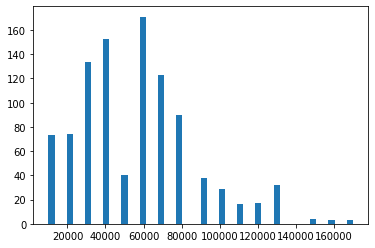

In [24]:
plt.hist(data['Income'], 50)
plt.show()

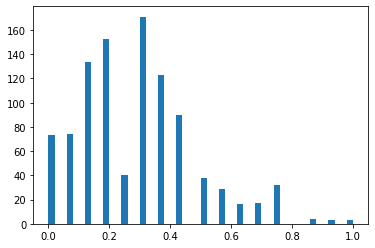

In [25]:
plt.hist(sc1_data, 50)
plt.show()